In [25]:
df_hitter_perf = pd.read_csv('./data/hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('./data/hitter_etc.csv', index_col=0)

In [26]:
df_hitter_perf.columns, df_hitter_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'년도', u'AVG_A',
        u'OBP_A', u'SLG_A', u'WAR_A', u'HR%_A', u'BB%_A', u'K%_A', u'BIPA_A',
        u'Spd_A', u'PSN_A', u'wOBA_A', u'wRC_A', u'wRAA_A', u'AVG_B', u'OBP_B',
        u'SLG_B', u'WAR_B', u'HR%_B', u'BB%_B', u'K%_B', u'BIPA_B', u'Spd_B',
        u'PSN_B', u'wOBA_B', u'wRC_B', u'wRAA_B'],
       dtype='object'),
 Index([u'Name', u'Year', u'Spectators', u'TitleSponsors', u'Broadcasting',
        u'GDP', u'Clubs', u'FA_Pitcher', u'FA_Hitter', u'BirthYear', u'Age',
        u'Captain', u'NationalMember', u'Marriage', u'Surgery', u'Salary',
        u'Total', u'Period', u'Transfer', u'GoldenGlove', u'Rookie', u'AllStar',
        u'Interest', u'Inflation', u'Hometown', u'RewardPlayer',
        u'PreviousTeam', u'NewTeam', u'Position'],
       dtype='object'))

In [27]:
dfX_hitter_perf = df_hitter_perf[['연도','AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['Year','AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfX_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc],axis=1)

dfX_hitter_year = df_hitter_perf['연도']
dfX_hitter_year.columns = ['Year']

In [28]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_hitter = df_hitter_etc['Period']

In [29]:
idx_gt2009 = dfX_hitter_year >= 2009
idx_lt2008 = dfX_hitter_year < 2009
df_hitter_gt2009 = df_hitter.ix[idx_gt2009,:]
df_hitter_gt2009.index = np.arange(1,len(df_hitter.ix[idx_gt2009,:])+1)
df_hitter_lt2008 = df_hitter.ix[idx_lt2008,:]
df_hitter_lt2008.index = np.arange(1,len(df_hitter.ix[idx_lt2008,:])+1)

In [30]:
idx = dfy_hitter == '-'
df_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc, dfy_hitter], axis=1)
df_hitter = df_hitter.drop(df_hitter.index[idx])
df_hitter.index = np.arange(1,len(df_hitter)+1)

In [31]:
idx = dfy_hitter == '6'
df_hitter['Period'][idx] = '4'

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
df_hitter.shape

(123, 42)

In [39]:
import StringIO
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(classifier):
   dot_buf = StringIO.StringIO()
   export_graphviz(classifier, out_file=dot_buf, feature_names=df_hitter.ix[:,:-1].columns)
   graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
   image = graph.create_png()
   return Image(image)

In [40]:
X =df_hitter.ix[:,1:-1].values
y =df_hitter.ix[:,-1].values

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [112]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

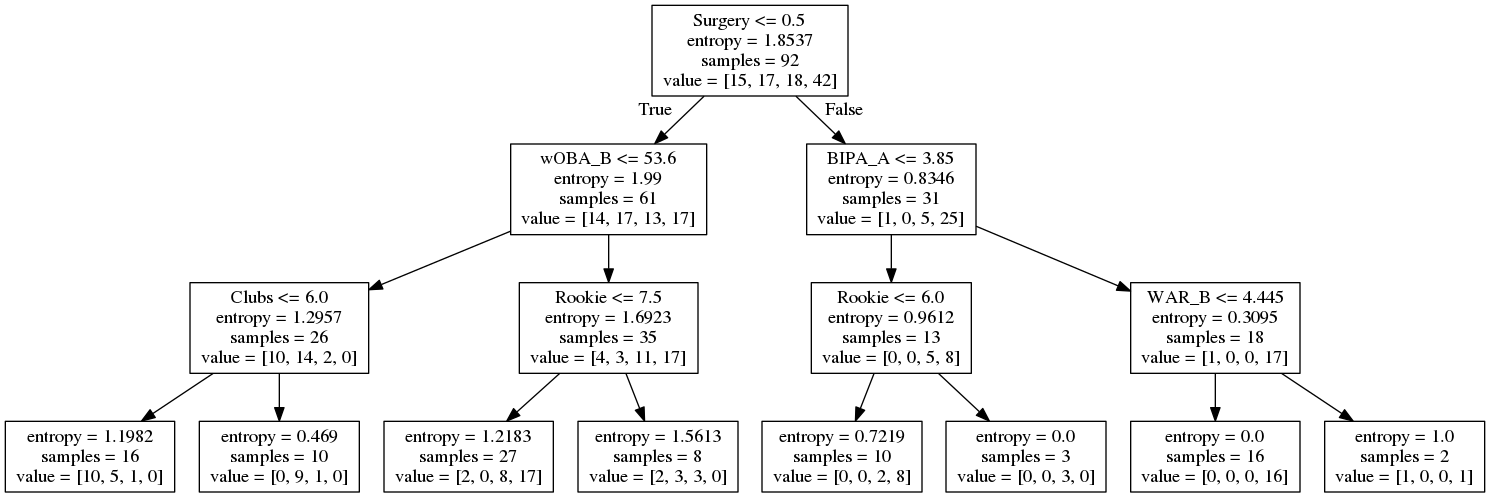

In [113]:
command_buf = StringIO.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=df_hitter.ix[:,:-1].columns) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
Image(image)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, model.predict(X_train))

array([[11,  2,  0,  2],
       [ 5, 12,  0,  0],
       [ 1,  4,  3, 10],
       [ 1,  0,  0, 41]])

In [115]:
confusion_matrix(y_test, model.predict(X_test))

array([[5, 0, 0, 3],
       [2, 7, 0, 0],
       [2, 0, 0, 0],
       [2, 3, 0, 7]])

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          1       0.61      0.73      0.67        15
          2       0.67      0.71      0.69        17
          3       1.00      0.17      0.29        18
          4       0.77      0.98      0.86        42

avg / total       0.77      0.73      0.69        92



In [117]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          1       0.45      0.62      0.53         8
          2       0.70      0.78      0.74         9
          3       0.00      0.00      0.00         2
          4       0.70      0.58      0.64        12

avg / total       0.59      0.61      0.60        31



In [18]:
df_hitter.head()

,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BB_A,K_A,BIPA_A,Spd_A,PSN_A,...,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Period
1,0.284,0.362,0.510,5.50,4.25,9.3,15.1,0.297,3.5,3.64,...,33,1,0,1,1,1,6,1,7,3
2,0.332,0.453,0.533,8.75,3.10,17.7,11.7,0.355,5.3,17.49,...,30,0,0,0,0,1,3,0,7,4
3,0.346,0.452,0.624,8.56,5.28,15.5,14.3,0.365,4.9,25.26,...,34,1,1,1,1,1,4,1,8,4
4,0.301,0.353,0.367,1.63,0.54,6.2,7.5,0.321,4.2,3.00,...,30,0,0,1,0,1,0,0,0,4
5,0.282,0.419,0.615,7.47,7.74,16.8,21.7,0.289,3.0,11.92,...,32,0,1,1,1,1,3,0,7,3


In [120]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_hitter.ix[:,-1],  model.predict(df_hitter.ix[:,:-1]), pos_label=0)

ValueError: Number of features of the model must match the input. Model n_features is 40 and input n_features is 41 

In [ ]:
model.predict(df_hitter.ix[:,:-1]).shape

In [29]:
df_hitter.ix[:,-1].shape

(123,)